# Data Understanding

### Import datasets (Commented because it is not needed for now)

### Student Data

In [28]:
import pandas as pd

#student = pd.read_sas(
#    "../../databases/2022/STU_QQQ_SAS/CY08MSP_STU_QQQ.SAS7BDAT", format="sas7bdat"
#)

student = pd.read_csv('../../databases/2022/STU_QQQ_SAS/student2022.csv')


In [29]:
repeating_students = student[student["REPEAT"] == 1]
non_repeating_students = student[student["REPEAT"] == 0]
print(f"Número de alunos total: {len(student)}")
print(f"Número de alunos repetentes: {len(repeating_students)}")

repeating_students_grades = repeating_students["ST001D01T"].value_counts().reset_index()
repeating_students_grades.columns = ["Ano", "Contagem"]

print(repeating_students_grades)

Número de alunos total: 613744
Número de alunos repetentes: 60004
    Ano  Contagem
0   9.0     31402
1  10.0     13111
2   8.0     10751
3   7.0      3004
4  11.0      1164
5  98.0       283
6  96.0       227
7  12.0        59
8  99.0         3


In [30]:
def filter_by_grade(dataframe, grade):
    return dataframe[dataframe["ST001D01T"] == grade]

# Grades can be:
# 7  = "Grade 7"
# 8  = "Grade 8"
# 9  = "Grade 9"
# 10  = "Grade 10"
# 11  = "Grade 11"
# 12  = "Grade 12"
# 13  = "Grade 13"
# 96  = "Ungraded"
# 97  = "Not Applicable"
# 98  = "Invalid"
# 99  = "Missing"

grade_9_repeating = filter_by_grade(repeating_students, 9)
grade_9_repeating

,CNT,CNTRYID,CNTSCHID,CNTSTUID,CYC,NatCen,STRATUM,SUBNATIO,REGION,OECD,...,PV3MPRE,PV4MPRE,PV5MPRE,PV6MPRE,PV7MPRE,PV8MPRE,PV9MPRE,PV10MPRE,SENWT,VER_DAT
37,b'ALB',8.0,800268.0,800047.0,b'08MS',b'000800',b'ALB08',b'0080000',800.0,0.0,...,270.961,257.030,180.092,276.137,272.910,246.445,329.200,254.833,0.74681,b'03MAY23:10:11:26'
85,b'ALB',8.0,800158.0,800110.0,b'08MS',b'000800',b'ALB01',b'0080000',800.0,0.0,...,337.829,173.310,172.989,229.215,207.678,199.163,219.315,299.902,0.68939,b'03MAY23:10:11:25'
104,b'ALB',8.0,800296.0,800133.0,b'08MS',b'000800',b'ALB03',b'0080000',800.0,0.0,...,273.602,156.473,318.015,267.753,305.289,135.446,261.844,171.699,1.91025,b'03MAY23:10:11:25'
105,b'ALB',8.0,800099.0,800134.0,b'08MS',b'000800',b'ALB01',b'0080000',800.0,0.0,...,375.109,311.722,286.254,505.603,413.157,335.869,338.832,308.473,1.37877,b'03MAY23:10:11:25'
129,b'ALB',8.0,800105.0,800165.0,b'08MS',b'000800',b'ALB08',b'0080000',800.0,0.0,...,315.108,349.016,436.196,353.860,310.779,296.947,273.907,293.165,1.15179,b'03MAY23:10:11:26'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613651,b'UZB',860.0,86000140.0,86007395.0,b'08MS',b'086000',b'UZB04',b'8600000',86000.0,0.0,...,257.751,381.980,206.179,195.833,311.641,319.017,302.738,282.269,0.63855,b'02MAY23:13:18:13'
613662,b'UZB',860.0,86000105.0,86007406.0,b'08MS',b'086000',b'UZB17',b'8600000',86000.0,0.0,...,424.805,396.259,305.770,319.786,405.843,345.949,409.442,430.769,0.58577,b'02MAY23:13:18:14'
613669,b'UZB',860.0,86000200.0,86007413.0,b'08MS',b'086000',b'UZB14',b'8600000',86000.0,0.0,...,305.305,393.190,391.591,281.221,328.176,310.618,266.650,306.106,0.71953,b'02MAY23:13:18:14'
613678,b'UZB',860.0,86000041.0,86007422.0,b'08MS',b'086000',b'UZB05',b'8600000',86000.0,0.0,...,309.695,312.434,254.747,323.219,385.466,330.085,215.592,296.846,0.66356,b'02MAY23:13:18:13'


In [31]:
import numpy as np
from columns_list import math_subscales, math_columns, science_columns, reading_columns


def get_math_results(dataframe, math_columns):
    math_results = dataframe.copy()
    math_results["Avg Math Result"] = math_results[math_columns].mean(axis=1)
    # math_results["Min Math Result"] = math_results[math_columns].min(axis=1)
    # math_results["Max Math Result"] = math_results[math_columns].max(axis=1)

    math_results = math_results.drop(columns=math_columns)

    return math_results


def get_science_results(dataframe, science_columns):
    scie_results = dataframe.copy()
    scie_results["Avg Science Result"] = scie_results[science_columns].mean(axis=1)
    # scie_results["Min Science Result"] = scie_results[science_columns].min(axis=1)
    # scie_results["Max Science Result"] = scie_results[science_columns].max(axis=1)

    scie_results = scie_results.drop(columns=science_columns)

    return scie_results


def get_reading_results(dataframe, reading_columns):
    reading_results = dataframe.copy()
    reading_results["Avg Reading Result"] = reading_results[reading_columns].mean(
        axis=1
    )
    # reading_results["Min Reading Result"] = reading_results[reading_columns].min(axis=1)
    # reading_results["Max Reading Result"] = reading_results[reading_columns].max(axis=1)

    reading_results = reading_results.drop(columns=reading_columns)

    return reading_results


def remove_columns(dataframe, column_list):
    new_df = dataframe.copy()
    new_df = new_df.drop(columns=column_list)

    return new_df

def get_student_results(dataframe, math_columns, science_columns, reading_columns):
    new_df = dataframe.copy()
    new_df = get_math_results(new_df, math_columns)
    new_df = get_science_results(new_df, science_columns)
    new_df = get_reading_results(new_df, reading_columns)

    return new_df

Remove content subscales of mathematics

In [33]:
# grade_9_repeating = filter_by_grade(repeating_students, 9)
repeating_students_filtered = get_student_results(
    grade_9_repeating, math_columns, science_columns, reading_columns
)
repeating_students_filtered = remove_columns(
    repeating_students_filtered, math_subscales
)
repeating_students_filtered

,CNT,CNTRYID,CNTSCHID,CNTSTUID,CYC,NatCen,STRATUM,SUBNATIO,REGION,OECD,...,W_FSTURWT78,W_FSTURWT79,W_FSTURWT80,UNIT,WVARSTRR,SENWT,VER_DAT,Avg Math Result,Avg Science Result,Avg Reading Result
37,b'ALB',8.0,800268.0,800047.0,b'08MS',b'000800',b'ALB08',b'0080000',800.0,0.0,...,6.75786,6.80700,6.61526,2.0,52.0,0.74681,b'03MAY23:10:11:26',230.1009,272.5924,277.4683
85,b'ALB',8.0,800158.0,800110.0,b'08MS',b'000800',b'ALB01',b'0080000',800.0,0.0,...,5.93007,5.89540,1.98279,2.0,74.0,0.68939,b'03MAY23:10:11:25',263.9948,290.5292,292.4141
104,b'ALB',8.0,800296.0,800133.0,b'08MS',b'000800',b'ALB03',b'0080000',800.0,0.0,...,6.11572,17.39554,16.57943,2.0,78.0,1.91025,b'03MAY23:10:11:25',267.7373,266.8022,288.1800
105,b'ALB',8.0,800099.0,800134.0,b'08MS',b'000800',b'ALB01',b'0080000',800.0,0.0,...,3.95338,3.93026,11.89675,2.0,19.0,1.37877,b'03MAY23:10:11:25',403.4443,370.9123,331.1637
129,b'ALB',8.0,800105.0,800165.0,b'08MS',b'000800',b'ALB08',b'0080000',800.0,0.0,...,9.85637,9.74830,3.22633,2.0,44.0,1.15179,b'03MAY23:10:11:26',266.6456,215.6632,305.9249
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613651,b'UZB',860.0,86000140.0,86007395.0,b'08MS',b'086000',b'UZB04',b'8600000',86000.0,0.0,...,83.33026,83.33026,39.79789,2.0,19.0,0.63855,b'02MAY23:13:18:13',299.9917,301.2023,251.9875
613662,b'UZB',860.0,86000105.0,86007406.0,b'08MS',b'086000',b'UZB17',b'8600000',86000.0,0.0,...,82.65206,28.96320,28.96320,2.0,54.0,0.58577,b'02MAY23:13:18:14',341.1871,309.7975,298.2344
613669,b'UZB',860.0,86000200.0,86007413.0,b'08MS',b'086000',b'UZB14',b'8600000',86000.0,0.0,...,34.68558,34.68558,104.05670,1.0,56.0,0.71953,b'02MAY23:13:18:14',341.6720,343.4569,339.0388
613678,b'UZB',860.0,86000041.0,86007422.0,b'08MS',b'086000',b'UZB05',b'8600000',86000.0,0.0,...,31.98757,31.98757,31.98757,1.0,69.0,0.66356,b'02MAY23:13:18:13',341.6767,317.8129,284.9316


In [34]:
numeric_correlations = repeating_students_filtered.corr(numeric_only=True)[
    "Avg Math Result"
].sort_values(ascending=False)

print(numeric_correlations)

Avg Math Result       1.000000
Avg Science Result    0.898073
Avg Reading Result    0.840276
LANGTEST_PAQ          0.480040
ST253Q01JA            0.458972
                        ...   
PA003Q16JA           -0.317682
PA003Q11JA           -0.334683
CREATOOS             -0.334809
ST001D01T                  NaN
REPEAT                     NaN
Name: Avg Math Result, Length: 1153, dtype: float64


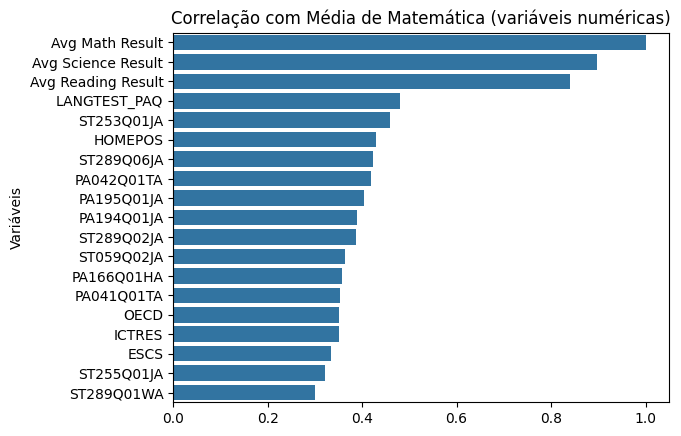

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

correlations = numeric_correlations[numeric_correlations > 0.3]

sns.barplot(x=correlations.values, y=correlations.index)
plt.title("Correlação com Média de Matemática (variáveis numéricas)")
plt.ylabel("Variáveis")
plt.show()

In [53]:
student["ST253Q01JA"].value_counts()
student["ST289Q06JA"].value_counts()
student["PA042Q01TA"].value_counts()

PA042Q01TA
1.0    15580
6.0    11080
2.0    10942
4.0     7672
3.0     7255
5.0     5174
Name: count, dtype: int64

In [26]:
categorical_columns = repeating_students_filtered.select_dtypes(
    include=["object", "category"]
).columns


new = categorical_columns.drop("CNT")
new
print(new)


Index(['CYC', 'NatCen', 'STRATUM', 'SUBNATIO', 'ST250D06JA', 'ST250D07JA',
       'ST251D08JA', 'ST251D09JA', 'ST330D10WA', 'OCOD1', 'OCOD2', 'OCOD3',
       'PROGN', 'COBN_S', 'COBN_M', 'COBN_F', 'VER_DAT'],
      dtype='object')


CNT, NatCen, STRATUM, SUBNATION - Relacionados (País)

COBN_S, COBN_M, COBN_F - País de nascimento próprio, mãe e pai, respetivamente

OCOD1, OCOD2, OCOD3 - Ocupação mãe, pai e próprio, respetivamente

Country specific:

ST250D06JA, ST250D07JA

ST251D08JA, ST251D09JA

ST330D10WA 

PROGN

In [27]:
for col in categorical_columns:
    print(f"Coluna: {col}")
    print(repeating_students_filtered[col].unique())
    print("-" * 30)
    

Coluna: CNT
["b'ALB'" "b'QAZ'" "b'ARG'" "b'AUS'" "b'AUT'" "b'BEL'" "b'BRA'" "b'BRN'"
 "b'BGR'" "b'KHM'" "b'CAN'" "b'CHL'" "b'TAP'" "b'COL'" "b'CRI'" "b'HRV'"
 "b'CZE'" "b'DNK'" "b'DOM'" "b'SLV'" "b'EST'" "b'FIN'" "b'FRA'" "b'GEO'"
 "b'PSE'" "b'DEU'" "b'GRC'" "b'GTM'" "b'HKG'" "b'HUN'" "b'IDN'" "b'IRL'"
 "b'ISR'" "b'ITA'" "b'KSV'" "b'JAM'" "b'KAZ'" "b'JOR'" "b'KOR'" "b'LVA'"
 "b'LTU'" "b'MAC'" "b'MYS'" "b'MLT'" "b'MEX'" "b'MNG'" "b'MDA'" "b'MNE'"
 "b'MAR'" "b'NLD'" "b'NZL'" "b'PAN'" "b'PRY'" "b'PER'" "b'PHL'" "b'POL'"
 "b'PRT'" "b'QAT'" "b'ROU'" "b'SRB'" "b'SGP'" "b'SVK'" "b'VNM'" "b'SVN'"
 "b'ESP'" "b'CHE'" "b'THA'" "b'ARE'" "b'TUR'" "b'QUR'" "b'GBR'" "b'USA'"
 "b'URY'" "b'UZB'"]
------------------------------
Coluna: CYC
["b'08MS'"]
------------------------------
Coluna: NatCen
["b'000800'" "b'003100'" "b'003200'" "b'003600'" "b'004000'" "b'005602'"
 "b'005601'" "b'007600'" "b'009600'" "b'010000'" "b'011600'" "b'012400'"
 "b'015200'" "b'015800'" "b'017000'" "b'018800'" "b'019100'" "b'

## Show relation of students by country that repeated

Text(0, 0.5, 'Number of students')

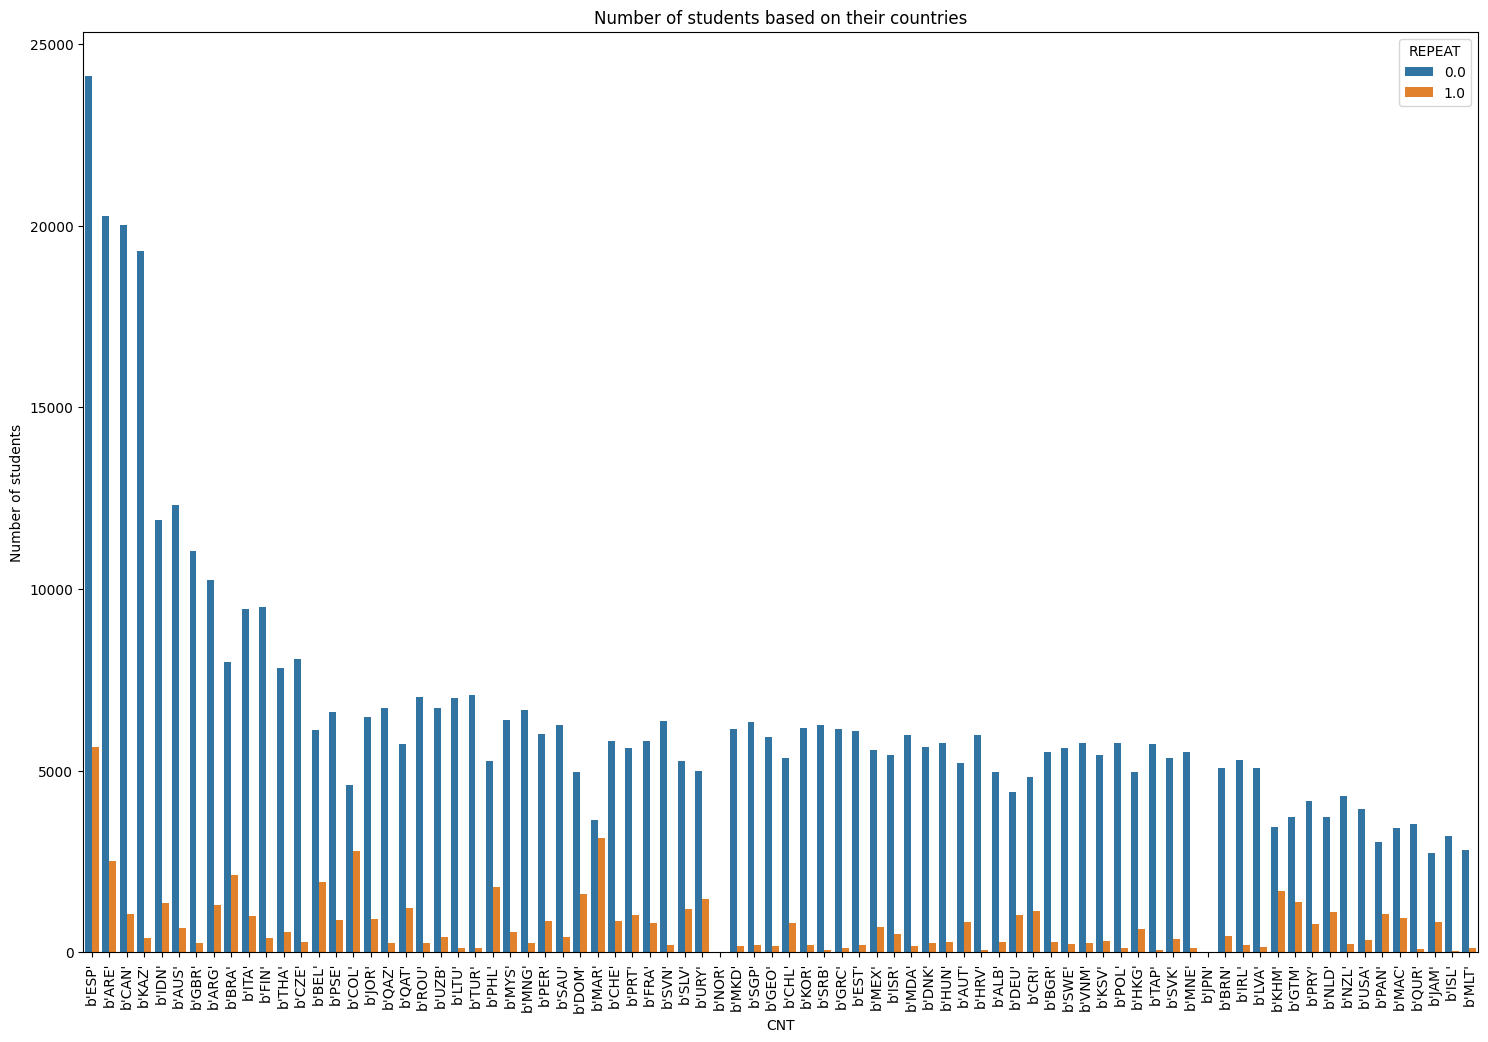

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = [18, 55])

plt.subplot(4, 1, 1)
base_color = sns.color_palette()[0]
sns.countplot(data = student, x = 'CNT', hue="REPEAT", order=student['CNT'].value_counts().index)

plt.title('Number of students based on their countries')
plt.xticks(rotation='vertical')
plt.ylabel('Number of students')

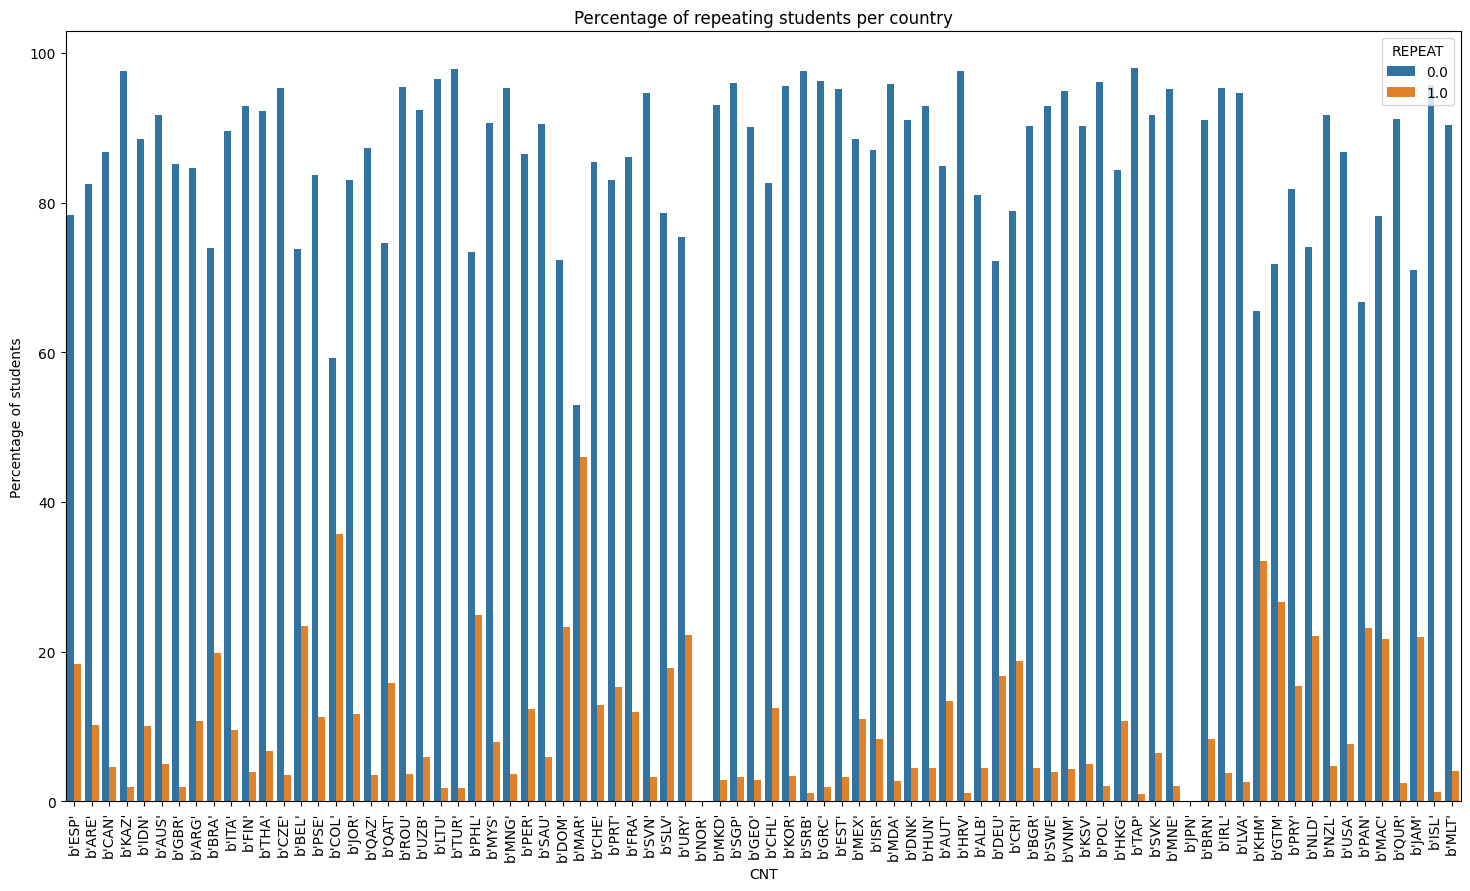

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

student_repeat = student.groupby(["CNT", "REPEAT"]).size().reset_index(name="count")
cnt_totals = student["CNT"].value_counts()

plt.figure(figsize=[18, 10])

sns.barplot(
    data=student_repeat,
    x="CNT",
    y=student_repeat.apply(
        lambda row: (row["count"] / cnt_totals[row["CNT"]]) * 100, axis=1
    ),
    hue="REPEAT",
    order=cnt_totals.index,
)

plt.title("Percentage of repeating students per country")
plt.xticks(rotation="vertical")
plt.ylabel("Percentage of students")

plt.show()